## Armando Tejeda
### Homework Week 10 
### 11/2/22

Question 14.1

The breast cancer data set breast-cancer-wisconsin.data.txt from http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/  (description at http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29 ) has missing values.
1.	Use the mean/mode imputation method to impute values for the missing data.
2.	Use regression to impute values for the missing data.
3.	Use regression with perturbation to impute values for the missing data.
4.	(Optional) Compare the results and quality of classification models (e.g., SVM, KNN) build using 
(1) the data sets from questions 1,2,3; 
(2) the data that remains after data points with missing values are removed; and 
(3) the data set when a binary variable is introduced to indicate missing values.

***

Solution: 

In [ ]:
# load packages I may need

library(tidyverse)
library(caret)
library(modelr)
library(ggthemes)
library(corrplot)

library(mice)
library(VIM)

Rows: 699 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,X1,X2,X3,X4,X5,X6,X8,X9,X10,X7,
683,1,1,1,1,1,1,1,1,1,1,0
16,1,1,1,1,1,1,1,1,1,0,1
,0,0,0,0,0,0,0,0,0,16,16


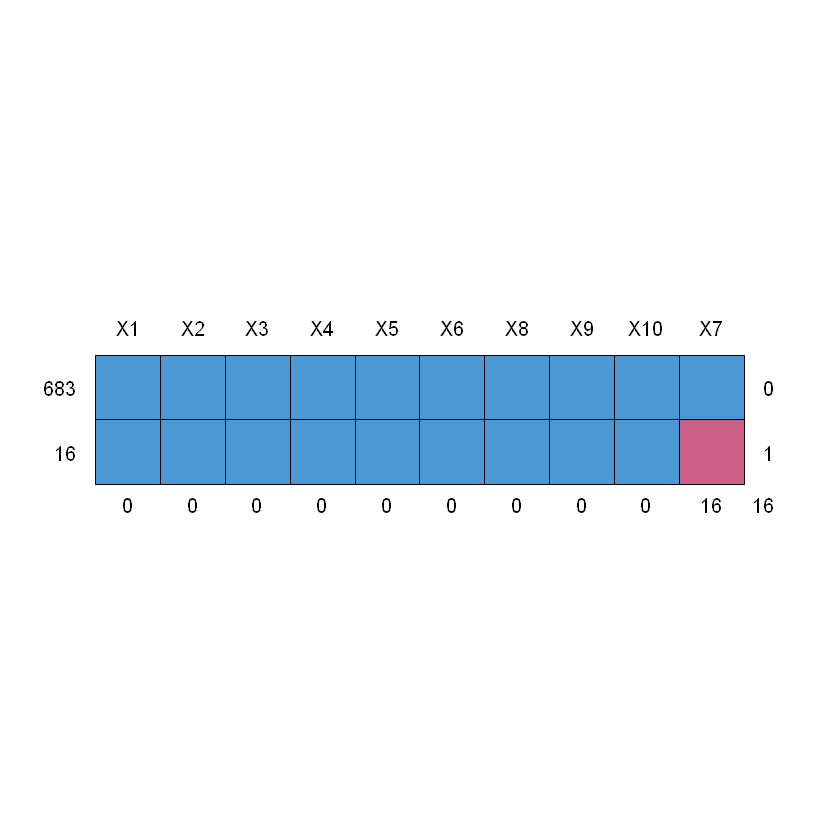


 Variables sorted by number of missings: 
 Variable      Count
       X7 0.02288984
       X1 0.00000000
       X2 0.00000000
       X3 0.00000000
       X4 0.00000000
       X5 0.00000000
       X6 0.00000000
       X8 0.00000000
       X9 0.00000000
      X10 0.00000000
      X11 0.00000000


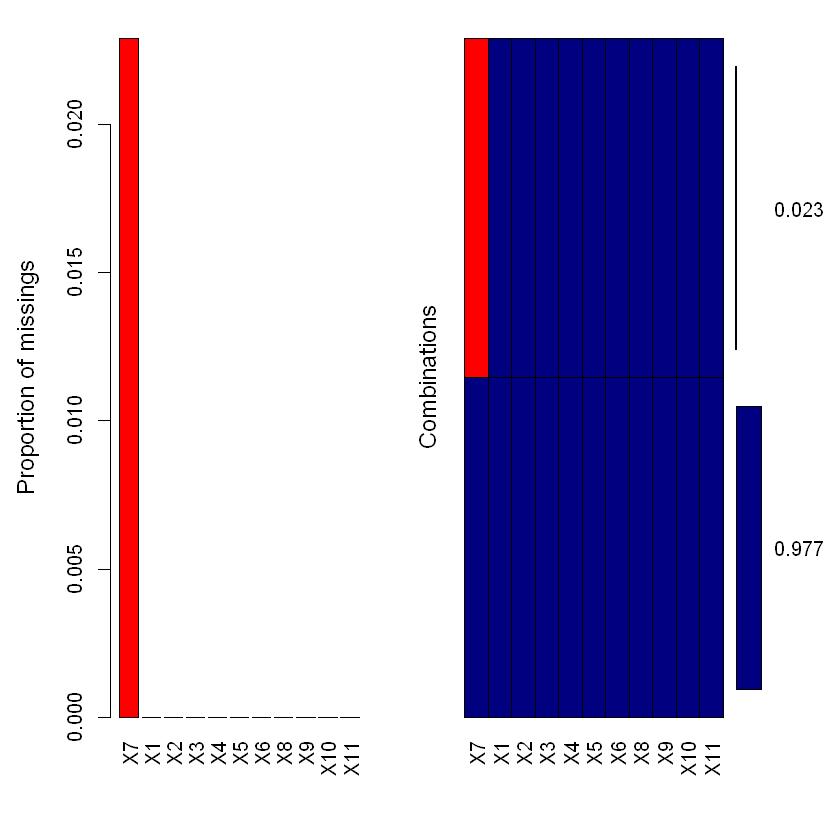

In [2]:
set.seed(1)

# read in the cancer data
cancer_df = read_delim('C:/Users/ateje/OneDrive/Desktop/VS Code Projects/GTx_MM_in_Analytics/R_projects/Week 10 HW/breast-cancer-wisconsin.data.txt', delim = ',',
                       col_names = F, na = c('?')) %>% 
        as.data.frame() %>% 
        mutate(X11 = ifelse(X11 == 2, 'Benign', 'Malignant'))


# using mice to see missing data - including complete cases
md.pattern(cancer_df[,-11])

# plot the missing data
plot_missing <- aggr(cancer_df, col = c('navyblue', 'red'), numbers = T, sortVars = T)

In [3]:
# imputation using the mice package - mean imputation
mean_impute <- mice(cancer_df, m = 5, meth = 'mean' )

# look at the values
mean_impute$imp



 iter imp variable
  1   1  X7
  1   2  X7
  1   3  X7
  1   4  X7
  1   5  X7
  2   1  X7
  2   2  X7
  2   3  X7
  2   4  X7
  2   5  X7
  3   1  X7
  3   2  X7
  3   3  X7
  3   4  X7
  3   5  X7
  4   1  X7
  4   2  X7
  4   3  X7
  4   4  X7
  4   5  X7
  5   1  X7
  5   2  X7
  5   3  X7
  5   4  X7
  5   5  X7


Warning message:
"Number of logged events: 1"


1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5



 iter imp variable
  1   1  X7
  1   2  X7
  1   3  X7
  1   4  X7
  1   5  X7
  2   1  X7
  2   2  X7
  2   3  X7
  2   4  X7
  2   5  X7
  3   1  X7
  3   2  X7
  3   3  X7
  3   4  X7
  3   5  X7
  4   1  X7
  4   2  X7
  4   3  X7
  4   4  X7
  4   5  X7
  5   1  X7
  5   2  X7
  5   3  X7
  5   4  X7
  5   5  X7


Warning message:
"Number of logged events: 1"


1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5


In [ ]:

# imputation using the mice package - regression ignoring model error
regression_impute <- mice(cancer_df, m = 5, meth = 'norm.predict')

# look at the values
regression_impute$imp

In [4]:
# imputation using the mice package - perturbation impute
pert_impute <- mice(cancer_df, m = 5, meth = 'norm.nob')


# look at the values
pert_impute$imp


 iter imp variable
  1   1  X7
  1   2  X7
  1   3  X7
  1   4  X7
  1   5  X7
  2   1  X7
  2   2  X7
  2   3  X7
  2   4  X7
  2   5  X7
  3   1  X7
  3   2  X7
  3   3  X7
  3   4  X7
  3   5  X7
  4   1  X7
  4   2  X7
  4   3  X7
  4   4  X7
  4   5  X7
  5   1  X7
  5   2  X7
  5   3  X7
  5   4  X7
  5   5  X7


Warning message:
"Number of logged events: 1"


1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,2,3,4,5


In [5]:
# Data with mean impute
cancer_mean_df <- complete(mean_impute)
cancer_mean_df 


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1000025,5,1,1,1,2,1.000000,3,1,1,Benign
1002945,5,4,4,5,7,10.000000,3,2,1,Benign
1015425,3,1,1,1,2,2.000000,3,1,1,Benign
1016277,6,8,8,1,3,4.000000,3,7,1,Benign
1017023,4,1,1,3,2,1.000000,3,1,1,Benign
1017122,8,10,10,8,7,10.000000,9,7,1,Malignant
1018099,1,1,1,1,2,10.000000,3,1,1,Benign
1018561,2,1,2,1,2,1.000000,3,1,1,Benign
1033078,2,1,1,1,2,1.000000,1,1,5,Benign


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1000025,5,1,1,1,2,1.000000,3,1,1,Benign
1002945,5,4,4,5,7,10.000000,3,2,1,Benign
1015425,3,1,1,1,2,2.000000,3,1,1,Benign
1016277,6,8,8,1,3,4.000000,3,7,1,Benign
1017023,4,1,1,3,2,1.000000,3,1,1,Benign
1017122,8,10,10,8,7,10.000000,9,7,1,Malignant
1018099,1,1,1,1,2,10.000000,3,1,1,Benign
1018561,2,1,2,1,2,1.000000,3,1,1,Benign
1033078,2,1,1,1,2,1.000000,1,1,5,Benign


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1000025,5,1,1,1,2,1.000000,3,1,1,Benign
1002945,5,4,4,5,7,10.000000,3,2,1,Benign
1015425,3,1,1,1,2,2.000000,3,1,1,Benign
1016277,6,8,8,1,3,4.000000,3,7,1,Benign
1017023,4,1,1,3,2,1.000000,3,1,1,Benign
1017122,8,10,10,8,7,10.000000,9,7,1,Malignant
1018099,1,1,1,1,2,10.000000,3,1,1,Benign
1018561,2,1,2,1,2,1.000000,3,1,1,Benign
1033078,2,1,1,1,2,1.000000,1,1,5,Benign


In [ ]:

# Data with regression prediction impute
cancer_regression_df <- complete(regression_impute)
cancer_regression_df 


In [ ]:


# Data with pertubation impute
cancer_pert_df <- complete(pert_impute)
cancer_pert_df 

***
Question 15.1

Describe a situation or problem from your job, everyday life, current events, etc., for which optimization would be appropriate. What data would you need? 

***

Solution: 

Optimization can be used for airline to decide the number of first-class tickets, advantage tickets, and coach tickets they should sell to maximize their profits for their flights. The company might need to consider certain constraints like number of first class and coach seats available and the size of the staff to serve first class, etc. 
